In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv("D:\projects(training)\Mall Customer Segmrntation\Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
data.shape

(200, 5)

In [72]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [74]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le =LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])

In [77]:
data.dtypes

CustomerID                int64
Genre                     int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

Text(0.5, 1.0, 'correlation')

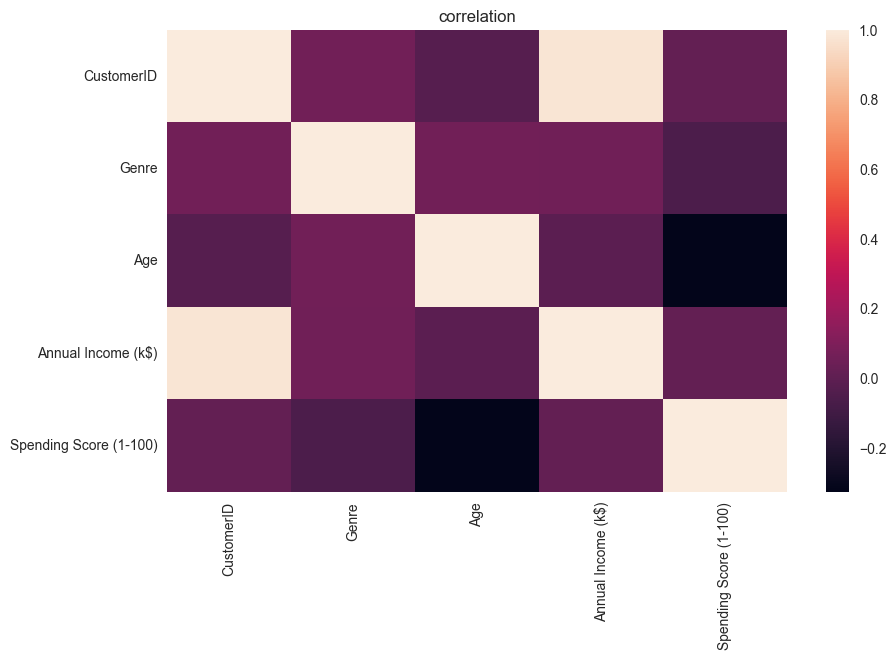

In [78]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data.corr())
heatmap.set_title('correlation')

In [79]:
from sklearn.preprocessing import StandardScaler
col_name = ['Annual Income (k$)' , 'Spending Score (1-100)']
sd = StandardScaler()
features = data[col_name]
scaler = sd.fit(features.values)
features = scaler.fit_transform(features.values)
Scaled_f = pd.DataFrame(features , columns= col_name)

In [80]:
Scaled_f.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [81]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

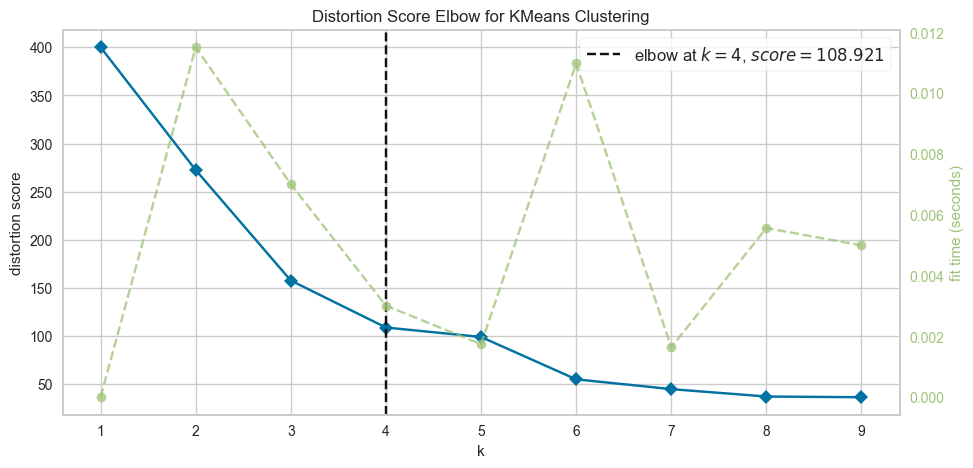

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
model =KMeans()
visualizer = KElbowVisualizer(model, k = (1,10), size = (1080 , 500))
visualizer.fit(Scaled_f) 
visualizer.show()


In [83]:
# k = 4  = n_cluster

In [84]:
kmeans = KMeans(n_clusters =4 , random_state = 42)
clusters = kmeans.fit_predict(Scaled_f)

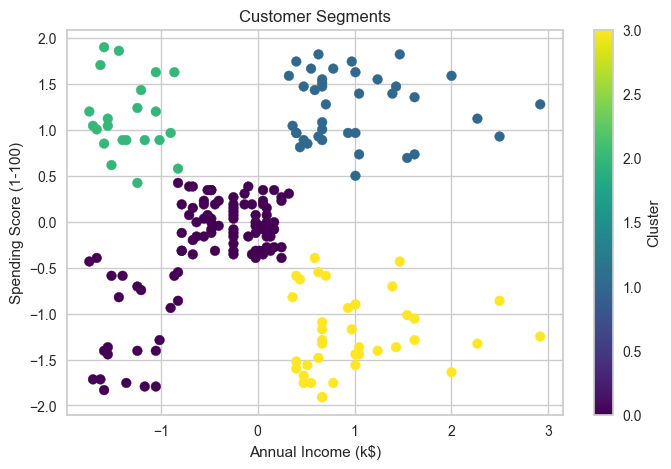

In [85]:
data['clusters'] = clusters
plt.figure(figsize=(8, 5))
scatter = plt.scatter(Scaled_f['Annual Income (k$)'], Scaled_f['Spending Score (1-100)'], c=clusters, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [86]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Scaled_f, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.49
